In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


In [14]:
df_confirmed.drop(labels=['Province/State','Lat','Long'], inplace= True, axis=1)

In [15]:
#EXTRACTING DATA OF NEPAL
df_confirmed_Nepal=df_confirmed.loc[df_confirmed['Country/Region'] == 'Nepal']

In [16]:
# dropping the country column
df_confirmed_Nepal.drop(labels=['Country/Region'], inplace= True, axis=1)

/home/mamata/day_one_task/venv/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
# df_confirmed_Nepal_arr
# df_confirmed_Nepal_arr=df_confirmed_Nepal.to_numpy()


In [18]:
data=df_confirmed_Nepal_arr.flatten().tolist()

In [24]:
# data
n_features=5

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Flatten

In [26]:
# preparing independent and dependent feature
def prepare_data(timeseries_data,n_features):
    X,y=[],[]
    for i in range(len(timeseries_data)):
        end_ix = i+n_features
        
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix],timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y) 
        

In [30]:
X,y = prepare_data(data,n_features)
# print(X)
# print(y)

In [31]:
X.shape

(188, 5)

In [32]:
#converting X into three dimensional shape so that it could be fed to lstm model
feature=1
X=X.reshape(X.shape[0],X.shape[1],feature)


In [34]:
# building the LSTM model
model =Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(n_features,feature)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit(X,y,epochs=300,verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/300
188/188 [==============================] - 3s 15ms/sample - loss: 45874617.1915
Epoch 2/300
188/188 [==============================] - 0s 668us/sample - loss: 32985236.1277
Epoch 3/300
188/188 [==============================] - 0s 316us/sample - loss: 9349556.4787
Epoch 4/300
188/188 [==============================] - 0s 309us/sample - loss: 2379617.8524
Epoch 5/300
188/188 [==============================] - 0s 334us/sample - loss: 305274.0332
Epoch 6/300
188/188 [==============================] - 0s 313us/sample - loss: 679309.8471
Epoch 7/300
188/188 [==============================] - 0s 332us/sample - loss: 4447746.2766
Epoch 8/300
188/188 [==============================] - 0s 312us/sample - loss: 9340047.2447
Epoch 9/300
188/188 [==============================] - 0s 338us/sample - loss: 3271238.2128
Epoch

188/188 [==============================] - 0s 329us/sample - loss: 187214.2909
Epoch 169/300
188/188 [==============================] - 0s 298us/sample - loss: 199830.0884
Epoch 170/300
188/188 [==============================] - 0s 295us/sample - loss: 190254.2746
Epoch 171/300
188/188 [==============================] - 0s 296us/sample - loss: 190133.5741
Epoch 172/300
188/188 [==============================] - 0s 281us/sample - loss: 189544.1061
Epoch 173/300
188/188 [==============================] - 0s 300us/sample - loss: 194736.2453
Epoch 174/300
188/188 [==============================] - 0s 280us/sample - loss: 183792.8010
Epoch 175/300
188/188 [==============================] - 0s 282us/sample - loss: 193757.8248
Epoch 176/300
188/188 [==============================] - 0s 299us/sample - loss: 182932.9834
Epoch 177/300
188/188 [==============================] - 0s 276us/sample - loss: 186631.4285
Epoch 178/300
188/188 [==============================] - 0s 280us/sample - loss: 185

In [40]:
# predict for next 10 days

x_input = np.array([19063,19273, 19547, 19771, 20086])
temp_input = list(x_input)
list_output=[]
i=0
while(i<10):
    if(len(temp_input)>5):
        x_input=np.array(temp_input[1:])
        print('{} day input {}'.format(i,x_input))
        x_input = x_input.reshape((1, n_features, feature))
        
        yhat=model.predict(x_input,verbose=0)
        print('{} day output {}'.format(i,yhat))
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        
        list_output.append(yhat[0][0])
        i=i+1
    
    else:
        x_input = x_input.reshape((1, n_features, feature))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        list_output.append(yhat[0][0])
        i=i+1       
        

[20413.406]
1 day input [19273.      19547.      19771.      20086.      20413.40625]
1 day output [[20762.822]]
2 day input [19547.         19771.         20086.         20413.40625
 20762.82226562]
2 day output [[21143.643]]
3 day input [19771.         20086.         20413.40625    20762.82226562
 21143.64257812]
3 day output [[21549.686]]
4 day input [20086.         20413.40625    20762.82226562 21143.64257812
 21549.68554688]
4 day output [[21972.115]]
5 day input [20413.406 20762.822 21143.643 21549.686 21972.115]
5 day output [[22422.457]]
6 day input [20762.822 21143.643 21549.686 21972.115 22422.457]
6 day output [[22889.07]]
7 day input [21143.643 21549.686 21972.115 22422.457 22889.07 ]
7 day output [[23377.666]]
8 day input [21549.686 21972.115 22422.457 22889.07  23377.666]
8 day output [[23884.031]]
9 day input [21972.115 22422.457 22889.07  23377.666 23884.031]
9 day output [[24410.13]]


In [54]:
data_new=data[-9:]
list_output

[20413.406,
 20762.822,
 21143.643,
 21549.686,
 21972.115,
 22422.457,
 22889.07,
 23377.666,
 23884.031,
 24410.13]

# visualizing


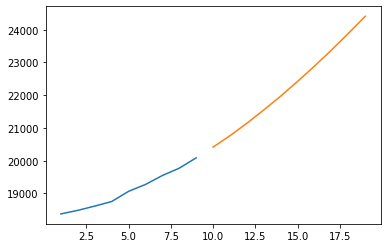

In [53]:
# visualizing the data
import matplotlib.pyplot as plt
day_new = np.arange(1,10)
day_pred = np.arange(10,20)
plt.plot(day_new,data_new)
plt.plot(day_pred,list_output)